<div style = "text-align:right"> Student: Antoine Moulin </div>

# SD212: Graph mining
## Lab 1: Sampling nodes and edges

You will learn to:
* use the networkx package
* sample nodes / edges

<b>Lab's author:</b> Thomas Bonald <br/>
<b>Date:</b> April 19, 2019

## 1. The networkx package

In [74]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [75]:
import numpy as np

In [76]:
import matplotlib.pyplot as plt

In [77]:
import warnings
warnings.filterwarnings('ignore')

### First graph

In [78]:
# Building the graph
graph = nx.Graph(name = "My first graph")
graph.add_edge(1,2)
graph.add_edge(2,3)

In [79]:
# Visualization
nx.draw(graph, with_labels=True)

In [80]:
# Summary
print(nx.info(graph))

Name: My first graph
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333


In [81]:
# List of nodes 
nodes = list(graph.nodes())
print(nodes)

[1, 2, 3]


In [82]:
# Iterator on nodes
for u in graph.nodes():
    print (u)

1
2
3


In [83]:
# First node through the list / the iterator
nodes_iter = iter(graph.nodes())
print(nodes[0])
print(next(nodes_iter))

1
1


## To do

* Get the second node using the list and the iterator
* Get the first edge using the list of edges and the iterator on edges

In [84]:
print('Second node:')
print('  - using list: {}'.format(nodes[1]))
print('  - using iterator: {}'.format(next(nodes_iter)))

Second node:
  - using list: 2
  - using iterator: 2


In [85]:
edges = list(graph.edges())
edges_iter = iter(graph.edges())
print('First edge: ')
print('  - using list: {}'.format(edges[0]))
print('  - using iterator: {}'.format(next(edges_iter)))

First edge: 
  - using list: (1, 2)
  - using iterator: (1, 2)


### Second graph

In [86]:
# Building the graph
social_graph = nx.Graph(name = "A social graph")
social_graph.add_edge('Albert','Barbara')
social_graph.add_edge('Albert','Carol')
social_graph.add_edge('Barbara','Dan')
social_graph.add_edge('Albert','Dan')

In [87]:
# Visualization
nx.draw(social_graph, with_labels=True)

In [88]:
# Summary
print(nx.info(social_graph))

Name: A social graph
Type: Graph
Number of nodes: 4
Number of edges: 4
Average degree:   2.0000


In [89]:
# List of nodes / edges
print(social_graph.nodes())
print(social_graph.edges())

['Albert', 'Barbara', 'Dan', 'Carol']
[('Albert', 'Barbara'), ('Albert', 'Dan'), ('Albert', 'Carol'), ('Barbara', 'Dan')]


In [90]:
# Node degree
print(social_graph.degree('Albert'))

3


In [91]:
# Neighbors
for u in social_graph.neighbors('Albert'):
    print(u)

Barbara
Dan
Carol


In [92]:
# List of node degrees
degrees = [social_graph.degree(u) for u in social_graph.nodes()]
print(degrees)

[3, 2, 2, 1]


In [93]:
# Data structure (dictionary of dictionaries)
for u in social_graph.nodes():
    print(u, social_graph[u])

Albert {'Barbara': {}, 'Dan': {}, 'Carol': {}}
Barbara {'Albert': {}, 'Dan': {}}
Dan {'Albert': {}, 'Barbara': {}}
Carol {'Albert': {}}


In [94]:
# Modifying the graph
edges = [('Barbara', 'Evelyn'), ('Evelyn', 'Dan')]
social_graph.add_edges_from(edges)

In [95]:
# Visualization
nx.draw(social_graph,with_labels=True)

### Layout

The layout allows you to visualize the graph (in 2D).

In [96]:
# Layout based on springs (default layout)
pos = nx.spring_layout(social_graph)
nx.draw(social_graph, pos, with_labels=True)

In [97]:
from pprint import pprint
pprint(pos)

{'Albert': array([ 0.30584749,  0.3283348 ]),
 'Barbara': array([-0.47697287, -0.05887668]),
 'Carol': array([ 0.94482561,  1.        ]),
 'Dan': array([-0.02954837, -0.47484671]),
 'Evelyn': array([-0.74415186, -0.79461141])}


Observe that two instances of the spring layout are generally not the same!

In [98]:
# Another layout
pos = nx.circular_layout(social_graph)
nx.draw(social_graph, pos, with_labels=True)

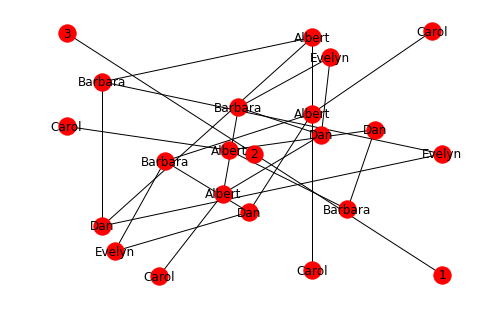

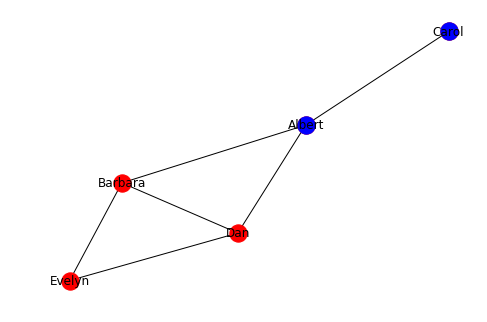

In [99]:
# Changing the color of some nodes
pos = nx.spring_layout(social_graph)

plt.figure()

nx.draw(social_graph, pos, with_labels=True)
nodes = nx.draw_networkx_nodes(social_graph, pos, nodelist=['Albert', 'Carol'], node_color='blue')

plt.show()

### Node labels

In most cases, the $n$ nodes are indexed from 0 to $n-1$. The name of each node (if any) is then stored as a label.

In [100]:
# Indexing nodes
names = list(social_graph.nodes())
social_graph = nx.convert_node_labels_to_integers(social_graph)

In [101]:
# Adding names as labels
for i in social_graph.nodes():
    social_graph.node[i]['name'] = names[i]

In [102]:
for u in social_graph.nodes():
    print(u, social_graph.node[u])

0 {'name': 'Evelyn'}
1 {'name': 'Albert'}
2 {'name': 'Barbara'}
3 {'name': 'Dan'}
4 {'name': 'Carol'}


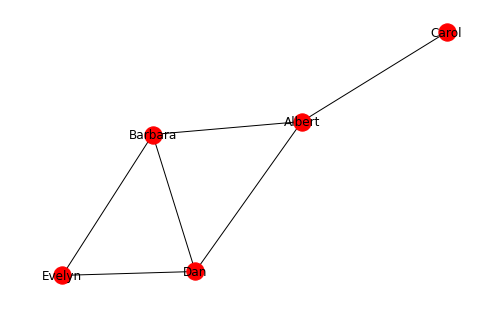

In [103]:
names = nx.get_node_attributes(social_graph, 'name')

plt.figure()
nx.draw(social_graph, labels=names)
plt.show()

In [104]:
# Adding other labels
women = ['Barbara', 'Carol', 'Evelyn']

for u in social_graph.nodes():
    if social_graph.node[u]['name'] in women:
        social_graph.node[u]['gender'] = 'Female'
    else:
        social_graph.node[u]['gender'] = 'Male'

In [105]:
for u in social_graph.nodes():
    print(u, social_graph.node[u])

0 {'name': 'Evelyn', 'gender': 'Female'}
1 {'name': 'Albert', 'gender': 'Male'}
2 {'name': 'Barbara', 'gender': 'Female'}
3 {'name': 'Dan', 'gender': 'Male'}
4 {'name': 'Carol', 'gender': 'Female'}


In [106]:
# Store the positions as labels
pos = nx.spring_layout(social_graph)
for u in social_graph.nodes():
    social_graph.node[u]['pos'] = tuple(pos[u])

In [107]:
for u in social_graph.nodes():
    print(u, social_graph.node[u])

0 {'name': 'Evelyn', 'gender': 'Female', 'pos': (0.37453456926234607, -0.79065652594986524)}
1 {'name': 'Albert', 'gender': 'Male', 'pos': (-0.15385645157923356, 0.32477084224240477)}
2 {'name': 'Barbara', 'gender': 'Female', 'pos': (0.3471735305854845, -0.16251778720847934)}
3 {'name': 'Dan', 'gender': 'Male', 'pos': (-0.094195853693379059, -0.37159652908406032)}
4 {'name': 'Carol', 'gender': 'Female', 'pos': (-0.47365579457521811, 1.0)}


In [108]:
pos = nx.get_node_attributes(social_graph, 'pos')
nx.draw(social_graph, pos, with_labels=True)

### Edge labels

In [109]:
# Adding weights
for u,v in social_graph.edges():
    social_graph[u][v]['weight'] = np.random.randint(1, 10)

In [110]:
# Data structure (dictionary of dictionaries)
for u in social_graph.nodes():
    print(u, social_graph[u])

0 {2: {'weight': 3}, 3: {'weight': 7}}
1 {2: {'weight': 3}, 3: {'weight': 5}, 4: {'weight': 5}}
2 {0: {'weight': 3}, 1: {'weight': 3}, 3: {'weight': 5}}
3 {0: {'weight': 7}, 1: {'weight': 5}, 2: {'weight': 5}}
4 {1: {'weight': 5}}


In [111]:
# Visualization with edge weights
weights = nx.get_edge_attributes(social_graph, 'weight')
nx.draw_networkx_edge_labels(social_graph, pos, edge_labels=weights)
nx.draw(social_graph, pos, labels=names)

In [112]:
# Visualization with edge widths = edge weights
weights_list = [weights[e] for e in social_graph.edges()]
nx.draw(social_graph, pos, labels=names, width=weights_list, edge_color='grey')

In [113]:
# Adding edge labels
categories = ['Family', 'Work', 'Friend']
for u, v in social_graph.edges():
    social_graph[u][v]['category'] = str(np.random.choice(categories))

In [114]:
# Data structure (dictionary of dictionaries)
for u in social_graph.nodes():
    print(u, social_graph[u])

0 {2: {'weight': 3, 'category': 'Friend'}, 3: {'weight': 7, 'category': 'Family'}}
1 {2: {'weight': 3, 'category': 'Family'}, 3: {'weight': 5, 'category': 'Work'}, 4: {'weight': 5, 'category': 'Friend'}}
2 {0: {'weight': 3, 'category': 'Friend'}, 1: {'weight': 3, 'category': 'Family'}, 3: {'weight': 5, 'category': 'Friend'}}
3 {0: {'weight': 7, 'category': 'Family'}, 1: {'weight': 5, 'category': 'Work'}, 2: {'weight': 5, 'category': 'Friend'}}
4 {1: {'weight': 5, 'category': 'Friend'}}


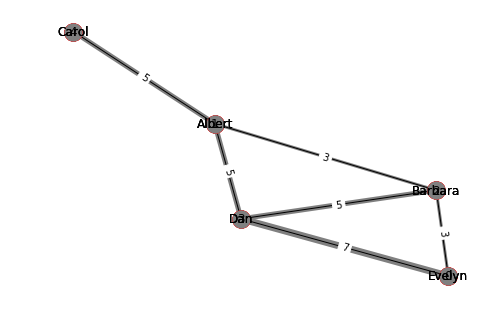

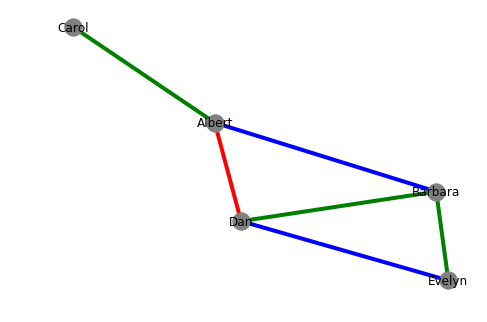

In [115]:
# Visualization with categories
nx.draw(social_graph, pos, labels=names, node_color='grey')

color_map = {'Family': 'b', 'Work': 'r', 'Friend': 'g'}

categories = nx.get_edge_attributes(social_graph, 'category')

edgelists = {}
for u, category in categories.items():
    edgelists.setdefault(category, []).append(u)

plt.figure()
    
nx.draw(social_graph, pos, labels=names, node_color='gray')
for category in edgelists:
    edges = nx.draw_networkx_edges(social_graph, pos, edgelist=edgelists[category], width=4, edge_color=color_map[category])
plt.show()

### Directed graphs

In [116]:
# Building the graph
edges = [(1,3), (3,2), (1,3), (1,4), (3,5), (2,4), (2,5), (4,3), (5,4), (5,6), (6,1)]
digraph = nx.from_edgelist(edges, create_using=nx.DiGraph())
digraph.graph['name'] = "A directed graph"

In [117]:
# Summary (observe the type of graph)
print(nx.info(digraph))

Name: A directed graph
Type: DiGraph
Number of nodes: 6
Number of edges: 10
Average in degree:   1.6667
Average out degree:   1.6667


In [118]:
# Visualization
nx.draw(digraph, with_labels=True)

### Writing and reading graphs

The `networkx` package allows you to write and read graphs in many formats. We will use the `graphml` format.

Complex data structures like `tuples` of `lists` are not supported. 

## To do

* Replace the label `pos` by two labels, one per coordinate.
* Save the graph in graphml format.
* Read the graph (use the type `int` for node indices) and check the labels.

In [119]:
for u in social_graph.nodes():
    print(u, social_graph.nodes[u]) # see the label pos

0 {'name': 'Evelyn', 'gender': 'Female', 'pos': (0.37453456926234607, -0.79065652594986524)}
1 {'name': 'Albert', 'gender': 'Male', 'pos': (-0.15385645157923356, 0.32477084224240477)}
2 {'name': 'Barbara', 'gender': 'Female', 'pos': (0.3471735305854845, -0.16251778720847934)}
3 {'name': 'Dan', 'gender': 'Male', 'pos': (-0.094195853693379059, -0.37159652908406032)}
4 {'name': 'Carol', 'gender': 'Female', 'pos': (-0.47365579457521811, 1.0)}


In [120]:
pos = nx.get_node_attributes(social_graph, 'pos')
for u in social_graph.nodes():
    social_graph.nodes[u]['pos_x'] = float(pos[u][0])
    social_graph.nodes[u]['pos_y'] = float(pos[u][1])
    del social_graph.nodes[u]['pos']
    
    print(u, social_graph.nodes[u]) # see the labels pos_x and pos_y

0 {'pos_x': 0.3745345692623461, 'name': 'Evelyn', 'gender': 'Female', 'pos_y': -0.7906565259498652}
1 {'pos_x': -0.15385645157923356, 'name': 'Albert', 'gender': 'Male', 'pos_y': 0.32477084224240477}
2 {'pos_x': 0.3471735305854845, 'name': 'Barbara', 'gender': 'Female', 'pos_y': -0.16251778720847934}
3 {'pos_x': -0.09419585369337906, 'name': 'Dan', 'gender': 'Male', 'pos_y': -0.3715965290840603}
4 {'pos_x': -0.4736557945752181, 'name': 'Carol', 'gender': 'Female', 'pos_y': 1.0}


In [121]:
nx.write_graphml(social_graph, "social_graph.graphml")
graph = nx.read_graphml("social_graph.graphml", node_type=int)

In [122]:
for u in graph.nodes():
    print(u, graph.nodes[u])

0 {'gender': 'Female', 'name': 'Evelyn', 'pos_x': 0.3745345692623461, 'pos_y': -0.7906565259498652}
1 {'gender': 'Male', 'name': 'Albert', 'pos_x': -0.15385645157923356, 'pos_y': 0.32477084224240477}
2 {'gender': 'Female', 'name': 'Barbara', 'pos_x': 0.3471735305854845, 'pos_y': -0.16251778720847934}
3 {'gender': 'Male', 'name': 'Dan', 'pos_x': -0.09419585369337906, 'pos_y': -0.3715965290840603}
4 {'gender': 'Female', 'name': 'Carol', 'pos_x': -0.4736557945752181, 'pos_y': 1.0}


## 2. Datasets

You will now work on two real datasets, OpenStreet and Openflights, to be downloaded [here](http://perso.telecom-paristech.fr/~bonald/graphs/lab1.zip).

### OpenStreet

OpenStreet is a graph of streets in the center of Paris. Nodes correspond to intersections. The graph is directed due to one-way streets. Weights correspond to distances between intersections  (in meters). Source: [Open Street Map](http://openstreetmap.fr)

In [123]:
# First download the datasets!
openstreet = nx.read_graphml("openstreet.graphml", node_type=int)

In [124]:
print(nx.info(openstreet))

Name: openstreet
Type: DiGraph
Number of nodes: 6025
Number of edges: 8170
Average in degree:   1.3560
Average out degree:   1.3560


In [125]:
# Get positions
pos_x = nx.get_node_attributes(openstreet, 'pos_x')
pos_y = nx.get_node_attributes(openstreet, 'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in openstreet.nodes()}

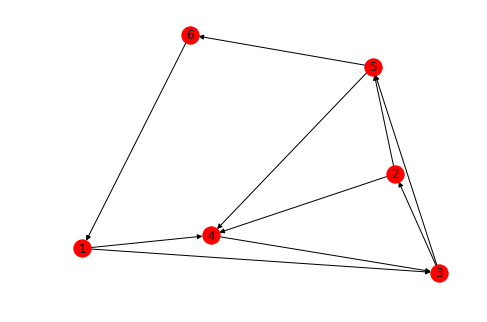

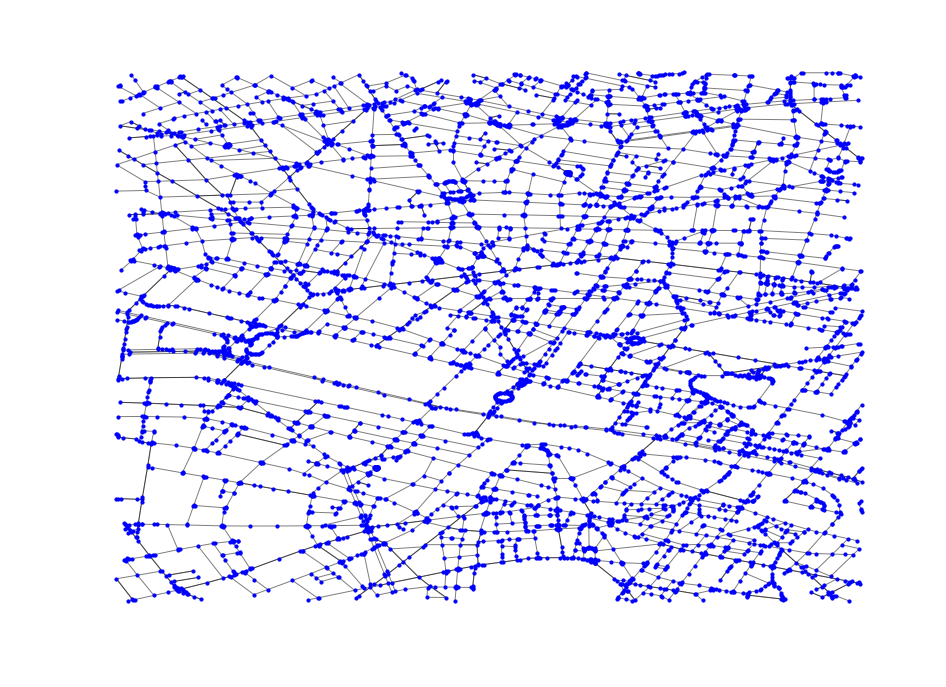

In [126]:
# Visualization
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx_nodes(openstreet, pos, node_size=10, node_color='b')
edges = nx.draw_networkx_edges(openstreet, pos, arrows=False, alpha=0.5)
plt.show()

In [127]:
# A shortest path 
path = nx.shortest_path(openstreet, 0, 1000, weight='weight')

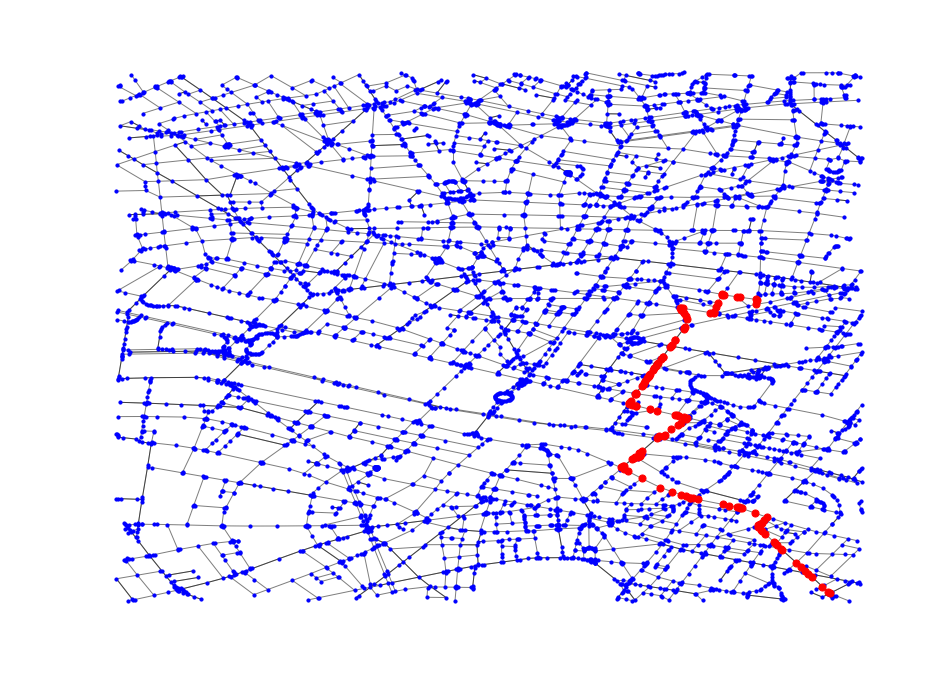

In [128]:
# Visualization
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx_nodes(openstreet, pos, node_size=10, node_color='b')
nx.draw_networkx_nodes(openstreet, pos, nodelist=path, node_size=50, node_color='r')
edges = nx.draw_networkx_edges(openstreet, pos, arrows=False, alpha=0.5)
plt.show()

## To do

* Show the shortest path from Pantheon to Gare Saint Lazare.

Notations :
   * Pantheon : <tt>pthn</tt>
   * Gare Saint Lazare : <tt>gsl</tt>

In [129]:
pthn_pos = (2.3525815, 48.8454189)
gsl_pos = (2.3252374, 48.87653)

pthn_nearest_node = 0
pthn_dist = np.inf
gsl_nearest_node = 0
gsl_dist = np.inf

for u in openstreet.nodes():
    current_pthn_dist = np.linalg.norm(np.array(pthn_pos) - np.array(pos[u]))
    if (current_pthn_dist < pthn_dist):
        pthn_dist = current_pthn_dist
        pthn_nearest_node = u
    
    current_gsl_dist = np.linalg.norm(np.array(gsl_pos) - np.array(pos[u]))
    if (current_gsl_dist < gsl_dist):
        gsl_dist = current_gsl_dist
        gsl_nearest_node = u
        
print('Pantheon\'s node: {}'.format(pthn_nearest_node))
print('Gare Saint Lazare\'s node: {}'.format(gsl_nearest_node))

Pantheon's node: 379
Gare Saint Lazare's node: 4873


In [130]:
pthn_gsl_path = nx.shortest_path(openstreet, pthn_nearest_node, gsl_nearest_node, weight='weight')

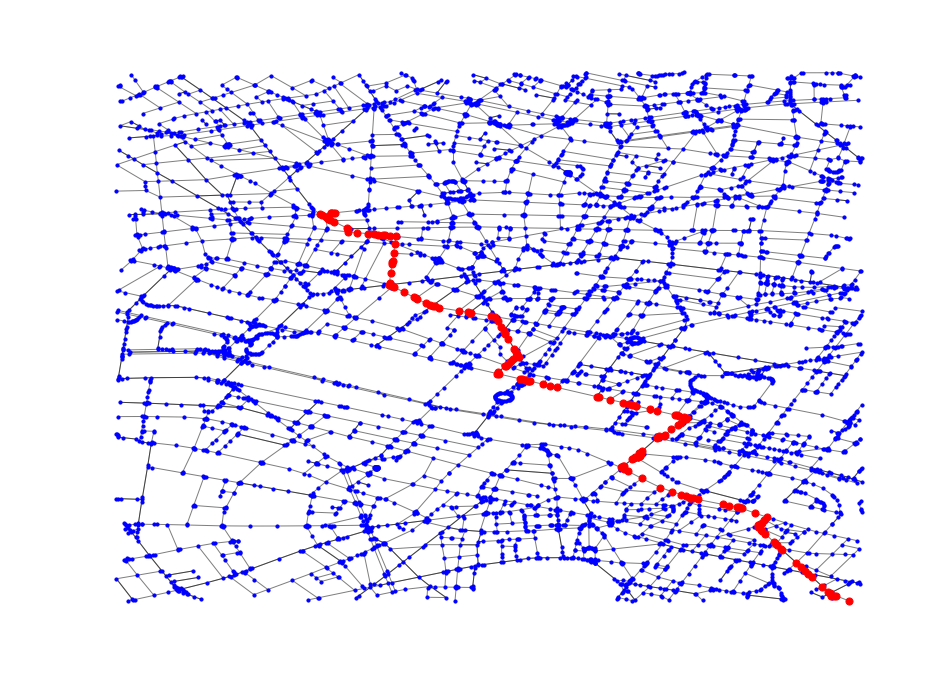

In [131]:
# Visualization
plt.figure(figsize=(16, 12))
plt.axis('off')
nx.draw_networkx_nodes(openstreet, pos, node_size=10, node_color='b')
nx.draw_networkx_nodes(openstreet, pos, nodelist=pthn_gsl_path, node_size=50, node_color='r')
edges = nx.draw_networkx_edges(openstreet, pos, arrows=False, alpha=0.5)
plt.show()

## OpenFlights

OpenFlights is the graph of the main international flights. Nodes are airports. The graph is undirected (all flights are bidirectional). Weights correspond to the number of daily flights between airports. Source: [Open Flight](http://openflights.org)

In [132]:
openflights = nx.read_graphml("openflights.graphml", node_type=int)

In [133]:
print(nx.info(openflights))

Name: Openflights
Type: Graph
Number of nodes: 3097
Number of edges: 18193
Average degree:  11.7488


In [134]:
# Get node from (partial) name

def get_node_from_name(name):
    list_nodes = []
    for u in openflights.nodes():
        if (openflights.node[u]['name'].find(name) >= 0):
            list_nodes.append(u)
    return list_nodes


for u in get_node_from_name('Charles de Gaulle'):
    print(u, openflights.node[u]['name'])

622 Charles de Gaulle International Airport


In [135]:
# Get positions
pos_x = nx.get_node_attributes(openflights, 'pos_x')
pos_y = nx.get_node_attributes(openflights, 'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in openflights.nodes()}

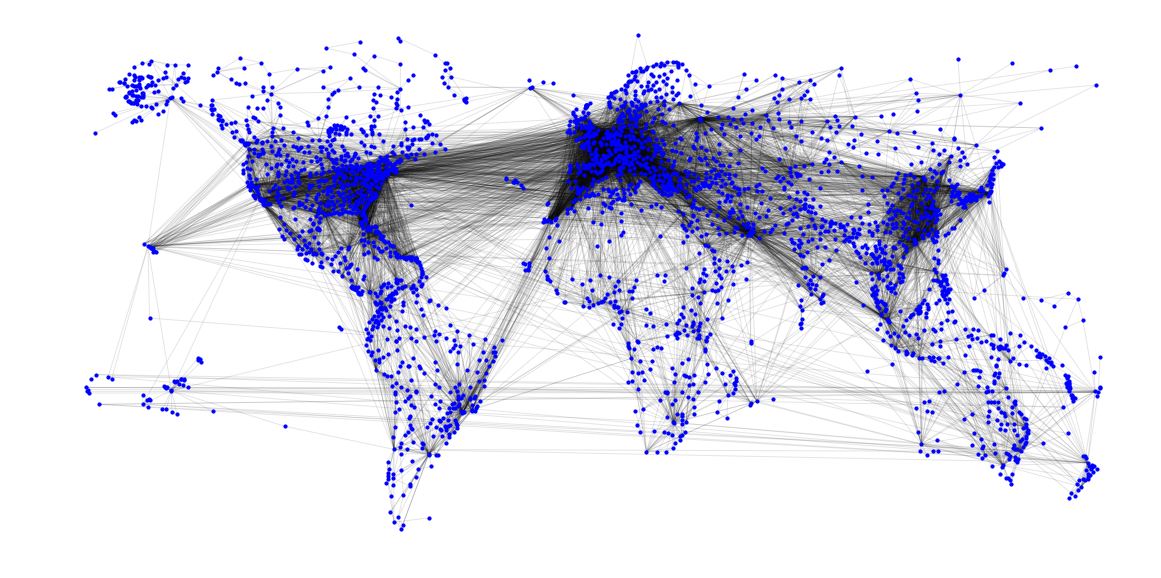

In [136]:
# Visualization
plt.figure(figsize=(20, 10))
plt.axis('off')
nx.draw_networkx_nodes(openflights, pos, node_size=10, node_color='b')
nx.draw_networkx_edges(openflights, pos, alpha=.1)
plt.show()

## To do

* List the top-10 airports in number of flights and show them on the map.
* Which proportion of traffic is generated by the top-100 airports?

In [137]:
top_airports = dict()

for u in openflights.nodes():
    nb_flights = 0

    for key, weight in openflights[u].items():
        nb_flights += weight['weight']

    top_airports[u] = nb_flights

In [138]:
import operator

sorted_airports = sorted(top_airports.items(), key=operator.itemgetter(1), reverse=True) # (airports, nb of flights)

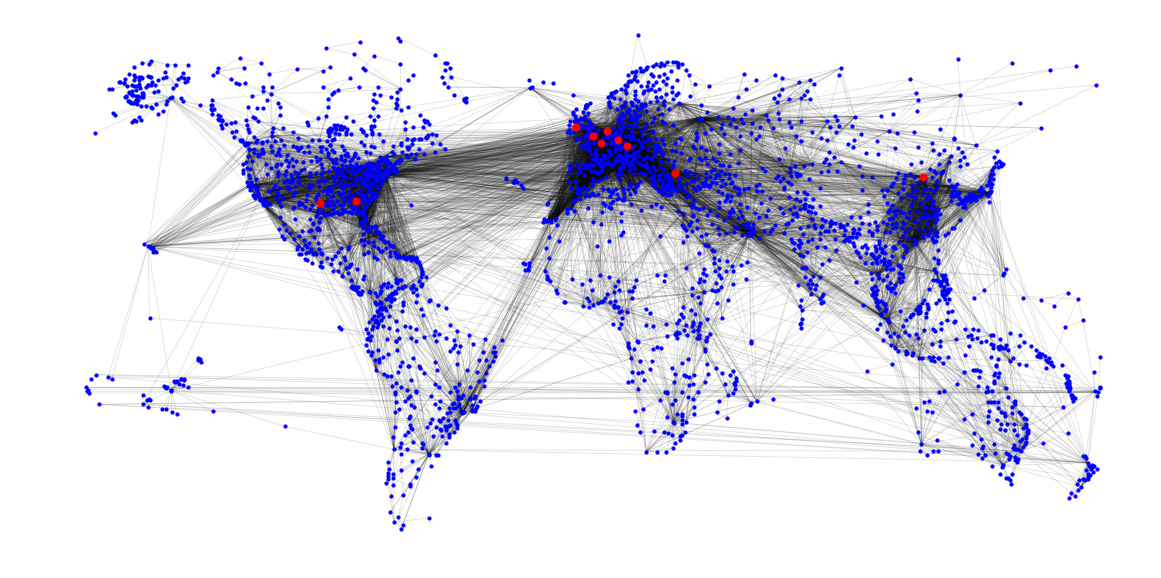

In [139]:
top10_airports = []
for k in range(10):
    top10_airports.append(sorted_airports[:10][k][0])

# Visualization
plt.figure(figsize=(20, 10))
plt.axis('off')
nx.draw_networkx_nodes(openflights, pos, node_size=10, node_color='b')
nx.draw_networkx_nodes(openflights, pos, nodelist=top10_airports, node_size=50, node_color='r')
nx.draw_networkx_edges(openflights, pos, alpha=.1)
plt.show()

In [140]:
total_traffic = 0
for u, v in openflights.edges():
    total_traffic += openflights[u][v]['weight']

proportion_top100 = 100 * sum(np.array(sorted_airports[:100])[:, 1]) / total_traffic
print('The proportion of traffic generated by the top-100 airports is: {} %'.format(proportion_top100))

The proportion of traffic generated by the top-100 airports is: 68.04730102322162 %


# 3. Node and edge sampling

In the rest of the lab, we work on the OpenFlights dataset.

## To do

List:
* 10 random nodes 
* 10 random neighbors
* 10 random ends of random edges

In each case, show both the name of the airport and the degree of the corresponding node.

In [141]:
# Random nodes

nodes = list(openflights.nodes())
np.random.shuffle(nodes) # shuffling nodes

airport_names = nx.get_node_attributes(openflights, 'name')
for k in range(10):
    print(airport_names[nodes[k]], openflights.degree[nodes[k]])

San Jose Airport 1
Oudomsay Airport 1
Broome International Airport 7
Kushiro Airport 3
Northern Peninsula Airport 1
Cibao International Airport 8
Dhangarhi Airport 1
Nan Airport 2
Pond Inlet Airport 2
Louisville International Standiford Field 23


In [142]:
# Random neighbors

airport_names = nx.get_node_attributes(openflights, 'name')
for k in range(10):
    if (len(openflights[nodes[k]]) > 1):
        random_neighbor = np.random.choice(openflights[nodes[k]])
    else:
        random_neighbor = list(openflights[nodes[k]])[0]

    print(airport_names[random_neighbor], openflights.degree[random_neighbor])

Ninoy Aquino International Airport 77
Wattay International Airport 16
Brisbane International Airport 56
New Chitose Airport 36
Cairns International Airport 30
Providenciales Airport 19
Tribhuvan International Airport 30
Don Mueang International Airport 48
Igloolik Airport 3
Dallas Fort Worth International Airport 186


In [143]:
# Shuffling edges

edges = list(openflights.edges())
np.random.shuffle(edges)

for k in range(10):
    random_end = np.random.choice(edges[k])
    print(airport_names[random_end], openflights.degree[random_end])

Beijing Capital International Airport 195
Bonaventure Airport 4
George Bush Intercontinental Houston Airport 168
Tianjin Binhai International Airport 49
Incheon International Airport 129
Billy Bishop Toronto City Centre Airport 13
Port Sudan New International Airport 4
Malabo Airport 9
Francisco de Sá Carneiro Airport 61
Kapuskasing Airport 1


## To do 

* Compute the mean and standard deviation of the degrees.
* Display the degree distribution. Can it be considered as a power law?
* Compute the mean and standard deviation of the degree of a random neighbor.
* Compute the mean and standard deviation of the degree of a node sampled from the edges. 
* Interpret the results.
* (optional) Do the same with nodes / edges sampled in proportion to their weights and interpret the results.

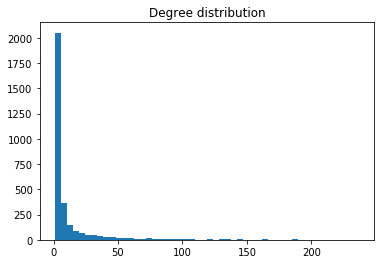

Mean of the degrees: 11.748789150791088 ; standard deviation of the degrees: 24.84163959533936


In [144]:
plt.figure()
plt.title('Degree distribution')
plt.hist(np.array(openflights.degree)[:, 1], bins=50)
plt.show()

print('Mean of the degrees: {} ; standard deviation of the degrees: {}'.format(np.array(openflights.degree)[:, 1].mean(),
                                                                               np.array(openflights.degree)[:, 1].std()))

Yes, it can be considered as a power law.

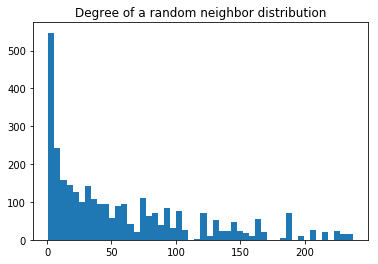

Mean of the degrees: 57.95576364223442 ; standard deviation of the degrees: 57.98975820527417


In [145]:
neighbor_degrees = []
for k in range(len(nodes)):
    if (len(openflights[nodes[k]]) > 1):
        random_neighbor = np.random.choice(openflights[nodes[k]])
    else:
        random_neighbor = list(openflights[nodes[k]])[0]

    neighbor_degrees.append(openflights.degree[random_neighbor])

plt.figure()
plt.title('Degree of a random neighbor distribution')
plt.hist(neighbor_degrees, bins=50)
plt.show()

neighbor_degrees = np.array(neighbor_degrees)

print('Mean of the degrees: {} ; standard deviation of the degrees: {}'.format(neighbor_degrees.mean(),
                                                                               np.array(neighbor_degrees.std())))

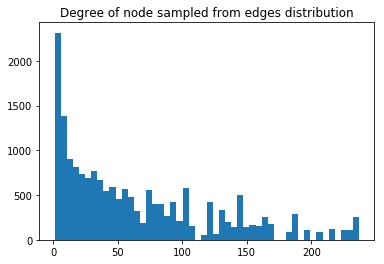

Mean of the degrees: 64.63579398669818 ; standard deviation of the degrees: 59.94796511068755


In [146]:
random_end_degrees = []
for k in range(len(edges)):
    random_end = np.random.choice(edges[k])
    random_end_degrees.append(openflights.degree[random_end])

plt.figure()
plt.title('Degree of node sampled from edges distribution')
plt.hist(random_end_degrees, bins=50)
plt.show()

random_end_degrees = np.array(random_end_degrees)

print('Mean of the degrees: {} ; standard deviation of the degrees: {}'.format(random_end_degrees.mean(),
                                                                               np.array(random_end_degrees.std())))

Interpretation: friendship paradox.